This series of algorithm implementation practice may be too easy for a lot of people. I took linear algebra over 10 years ago and I found it helpful as the practices cleared a lot of blurry spots for me. Link to implementation of linear regression is [here](https://www.kaggle.com/abigcleverdog/ml-algorithm-implementation-linear-reg-multivar).

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/suicide-rates-overview-1985-to-2016/master.csv


### Compare to Linear Regression:

#### Hypothesis

Linear Regression:

$h_\theta = \theta_0 + \theta_1 \cdot x$

$h(x) = \theta^T \cdot x$

Logistic (sigmoid) Regression:

$h^{Linear}_\theta = \theta_0 + \theta_1 \cdot x$

$h^{Logistic}_\theta = \frac{1}{1 + e^{-h^{Linear}_\theta}}$

$h(x) = \sigma (\theta^T \cdot x)$

$h(x) = \frac{1}{1 + e^{-\theta^T \cdot x}}$

#### Cost function

Linear Regression:

$J(\theta_0, \theta_1) = \frac{1}{2m} \sum_{i=1}^{m} (h_\theta(x_i) - y_i)^2$

Logistic Regression:

$J(\theta) = -\frac{1}{m} \sum_{i=1}^{m} [y_i log(h(x_i)) + (1 - y_i) log(1 - h(x_i))]$

#### Gradient

Linear Regression:

$\frac{\partial}{\partial \theta_j}J(\theta_0, \theta_1) = \sum_{i=1}^{m} [(h_\theta (x_i) - y) x_i]$

Logistic Regression:

$\frac{\partial J(\theta)}{\partial \theta_j} = \frac{1}{m} \sum_{i=1}^{m} (h(x^i) - y^i) x^i_j$

### univariate

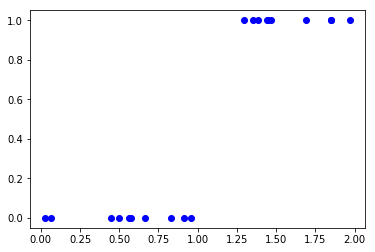

In [2]:
# create sample data
x1 = np.random.rand(10, 1)
x2 = 1 + np.random.rand(10, 1)
x = np.append(x1,x2)
y1 = [0] * 10
y2 = [1] * 10
y = y1 + y2

plt.plot(x, y, 'bo')

In [3]:
theta_0 = theta_1 = 0
g = lambda x: theta_0 + theta_1 * x
h = lambda x: 1 / (1 + np.exp(-g(x)))

lr = 0.05 # learning rate
epochs = 2000
costs = []
paras = []

def cal_cost(h, x, y):
    j = 0
    for i in range(len(x)):
        j += y[i] * np.log(h(x[i])) + (1 - y[i]) * np.log(1 - h(x[i]))
    return -j / len(x)

def cal_sum(h, x, y):
    sum_0 = sum_1 = 0
    for i in range(len(x)):
        sum_0 += (h(x[i]) - y[i])
        sum_1 += (h(x[i]) - y[i]) * x[i]
    return sum_0 / len(x), sum_1 / len(x)

for i in range(epochs):
    sum_0, sum_1 = cal_sum(h, x, y)
    theta_0 -= lr * sum_0
    theta_1 -= lr * sum_1
    cost = cal_cost(h, x, y)
    costs.append(cost)
    paras.append([theta_0, theta_1])
    
print(costs[-10:])
print(paras[-10:])

[0.16190167201569158, 0.16185435051343067, 0.1618070643897592, 0.16175981360172806, 0.1617125981064592, 0.1616654178611464, 0.1616182728230549, 0.1615711629495209, 0.16152408819795178, 0.16147704852582573]
[[-4.516174177514488, 4.355857726838089], [-4.517329604236761, 4.35687335801443], [-4.518484598983546, 4.357888609345399], [-4.519639162119505, 4.3589034811485465], [-4.520793294008825, 4.359917973741018], [-4.52194699501522, 4.3609320874395525], [-4.523100265501936, 4.361945822560484], [-4.524253105831745, 4.362959179419743], [-4.525405516366949, 4.363972158332856], [-4.5265574974693825, 4.364984759614945]]


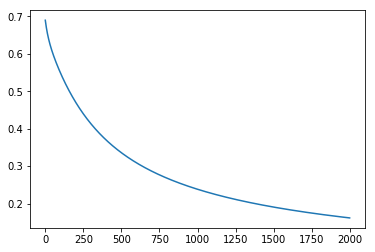

In [4]:
plt.plot(costs)

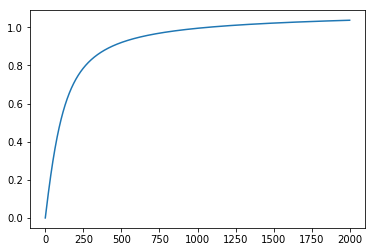

In [5]:
boundaries = [-i[0]/i[1] for i in paras]
plt.plot(boundaries)

### bivariate

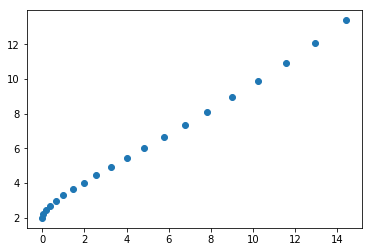

In [6]:
# create sample data
x_base = np.arange(0,2.0, 0.1)
x1 = x_base * x_base * 4
x2 = np.exp(x_base) * 2
y1 = [0] * 10
y2 = [1] * 10
y = y1 + y2
plt.scatter(x1, x2);

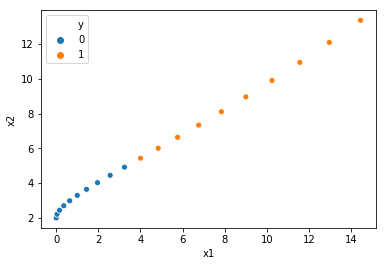

In [7]:
df = pd.DataFrame(list(zip(x1, x2, y)), 
               columns =['x1', 'x2', 'y']) 
sns.scatterplot(data = df, x = 'x1', y = 'x2', hue = 'y')

In [8]:
X = df.iloc[:,0:2]
y = df.iloc[:,2]

In [9]:
# iterative implementation
theta = [0, 0, 0]
g = lambda x: theta[0] + theta[1] * x[0] + theta[2] * x[1]
h = lambda x: 1 / (1 + np.exp(-g(x)))

lr = 0.5 # learning rate
epochs = 500
costs = []
paras = []

def cal_cost(h, x, y):
    j = 0
    for i in range(len(x)):
        j += y[i] * np.log(h(x.iloc[i])) + (1 - y[i]) * np.log(1 - h(x.iloc[i]))
    return -j / len(x)

def cal_sum(h, x, y):
    sum_0 = sum_1 = sum_2 = 0
    for i in range(len(x)):
        sum_0 += (h(x.iloc[i]) - y[i])
        sum_1 += (h(x.iloc[i]) - y[i]) * x.iloc[i][0]
        sum_2 += (h(x.iloc[i]) - y[i]) * x.iloc[i][1]
    return sum_0 / len(x), sum_1 / len(x), sum_2 / len(x)

def log_reg(h, x, y, theta, lr, epochs):
    for i in range(epochs):
        sum_0, sum_1, sum_2 = cal_sum(h, x, y)
        theta[0] -= lr * sum_0
        theta[1] -= lr * sum_1
        theta[2] -= lr * sum_2
        cost = cal_cost(h, x, y)
        costs.append(cost)
        paras.append(theta)

    print(costs[-5:])
    print(paras[-5:])
    
log_reg(h, X, y, theta, lr, epochs)

[0.035537083398893124, 0.035507303922729314, 0.035477600160812875, 0.035447971760575035, 0.03541841837182889]
[[-2.366722723240391, 4.662585965905747, -2.7918957289089747], [-2.366722723240391, 4.662585965905747, -2.7918957289089747], [-2.366722723240391, 4.662585965905747, -2.7918957289089747], [-2.366722723240391, 4.662585965905747, -2.7918957289089747], [-2.366722723240391, 4.662585965905747, -2.7918957289089747]]


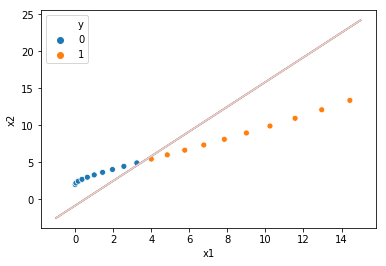

In [10]:
def plot_line(theta, x):
    y = lambda x: -(theta[0] + theta[1] * x)/theta[2]
    x_values = [i for i in range(int(min(x))-1, int(max(x))+2)]
    y_values = [y(x) for x in x_values]
    color = list(np.random.random(size=3))
    plt.plot(x_values, y_values, c = color)
    
    
sns.scatterplot(data = df, x = 'x1', y = 'x2', hue = 'y')
for i,t in enumerate(paras):
    if i%100 == 0: 
        plot_line(t, list(df.iloc[:, 0]))

The boundary changes very slowly as the samples were easily seperated in initial circles. further optimization does not leading to much change in cost function so there is not much driving force to adjust the boundary. In this specific senario, supported vector machine should work better.

In [11]:
# implementation with linear algebra
X = np.concatenate((np.ones((X.shape[0], 1)) , X), axis = 1)
theta = np.zeros(X.shape[1])

lr = 0.5 # learning rate
epochs = 500
costs = []
paras = []

def cal_cost(h, x, y):
    return (-y * np.log(h) - (1-y) * np.log(1-h)).mean()    

def log_reg(h, x, y, theta, lr, epochs):
    for i in range(epochs):
        z = np.dot(X, theta)
        h = 1/(1 + np.exp(-z))
        gradient = np.dot(X.T, (h - y)) / y.size
        theta -= lr * gradient
        cost = cal_cost(h, x, y)
        costs.append(cost)
        paras.append(theta)

    print(costs[-5:])
    print(paras[-5:])
    
log_reg(h, X, y, theta, lr, epochs)

[0.035566938944276004, 0.03553708339889315, 0.03550730392272936, 0.035477600160812896, 0.03544797176057514]
[array([-2.36672272,  4.66258597, -2.79189573]), array([-2.36672272,  4.66258597, -2.79189573]), array([-2.36672272,  4.66258597, -2.79189573]), array([-2.36672272,  4.66258597, -2.79189573]), array([-2.36672272,  4.66258597, -2.79189573])]


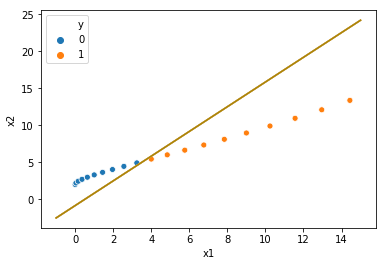

In [12]:
sns.scatterplot(data = df, x = 'x1', y = 'x2', hue = 'y')
for i,t in enumerate(paras):
    if i%100 == 0: 
        plot_line(t, list(df.iloc[:, 0]))

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score 

X = df.iloc[:,0:2]
y = df.iloc[:,2]
model = LogisticRegression()
model.fit(X, y)
predicted_classes = model.predict(X)
accuracy = accuracy_score(y, predicted_classes)
parameters = model.coef_
intercept = model.intercept_

print(accuracy)
print(intercept, parameters)

1.0
[-0.72723104] [[ 1.39822906 -0.82432925]]


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


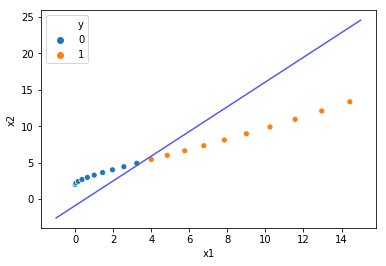

In [14]:
sns.scatterplot(data = df, x = 'x1', y = 'x2', hue = 'y')
plot_line([intercept, parameters[0][0], parameters[0][1]], list(df.iloc[:, 0]))

In [15]:
df = pd.read_csv('../input/suicide-rates-overview-1985-to-2016/master.csv')
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [16]:
df.rename(columns={'gdp_per_capita ($)': 'gdp_per_capita'}, inplace = True)
df = df[['gdp_per_capita', 'suicides_no', 'sex']]
def t_c(df):
    if df['sex'] == 'female':
        return 0    
    else:
        return 1
df['sex'] = df.apply(t_c, axis=1)
df['gdp_per_capita'] /= df['gdp_per_capita'].max()*0.01
df['suicides_no'] /= df['suicides_no'].max()*0.01
df.head()

,gdp_per_capita,suicides_no,sex
0,0.629986,0.094010,1
1,0.629986,0.071627,1
2,0.629986,0.062673,0
3,0.629986,0.004477,1
4,0.629986,0.040290,1


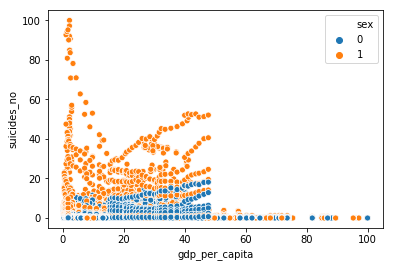

In [17]:
sns.scatterplot(data = df, y = 'suicides_no', x = 'gdp_per_capita', hue = 'sex')

In [18]:
X = df.iloc[:,0:2]
y = df.iloc[:,2]

X = np.concatenate((np.ones((X.shape[0], 1)) , X), axis = 1)
theta = np.zeros(X.shape[1])

lr = 0.15 # learning rate
epochs = 500
costs = []
paras = []

def cal_cost(h, x, y):
    return (-y * np.log(h) - (1-y) * np.log(1-h)).mean()    

def log_reg(h, x, y, theta, lr, epochs):
    for i in range(epochs):
        z = np.dot(X, theta)
        h = 1/(1 + np.exp(-z))
        gradient = np.dot(X.T, (h - y)) / y.size
        theta -= lr * gradient
        cost = cal_cost(h, x, y)
        costs.append(cost)
        paras.append(theta)

    print(costs[-5:])
    print(paras[-5:])
    
log_reg(h, X, y, theta, lr, epochs)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log
  del sys.path[0]


[1.7972055166771774, 4.389972295532834, 1.79713762763218, 4.390016150634785, 1.7970709522855268]
[array([ 0.065463  , -0.74265676,  1.49135113]), array([ 0.065463  , -0.74265676,  1.49135113]), array([ 0.065463  , -0.74265676,  1.49135113]), array([ 0.065463  , -0.74265676,  1.49135113]), array([ 0.065463  , -0.74265676,  1.49135113])]


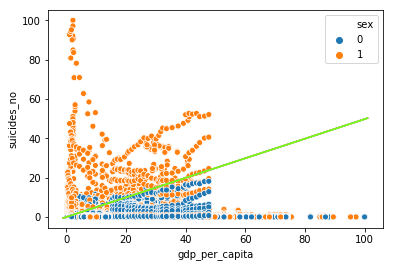

In [19]:
sns.scatterplot(data = df, y = 'suicides_no', x = 'gdp_per_capita', hue = 'sex')
for i,t in enumerate(paras):
    if i%100 == 0: 
        plot_line(t, list(df.iloc[:, 0]))

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score 

X = df.iloc[:,0:2]
model = LogisticRegression()
model.fit(X, y)
predicted_classes = model.predict(X)
accuracy = accuracy_score(y, predicted_classes)
parameters = model.coef_
intercept = model.intercept_

print(accuracy)
print(intercept, parameters)

0.5795111430625449
[-0.12447801] [[-0.0021458   0.18904629]]


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


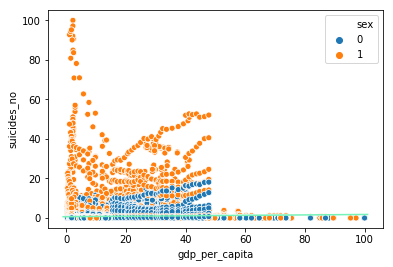

In [21]:
sns.scatterplot(data = df, y = 'suicides_no', x = 'gdp_per_capita', hue = 'sex')
plot_line([intercept, parameters[0][0], parameters[0][1]], list(df.iloc[:, 0]))